# Introduction

The aim of this notebook is to explore the terrorist events around the world.

It starts with importing necessary libraries and loading the data from the Global Terrorism Database. The analysis includes trends all around the world, in different regions, then Europe, Poland and Kraków.

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output

## Loading and visualization of the database

In [12]:
terror=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['Casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


## Preliminary analysis

In [3]:
print('This database includes information on terrorist attacks around the world from', terror['Year'].min(), 'through', terror['Year'].max())
print('While analyzing this database we can learn things such as:')
print('')
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)
print('Maximum people wounded in an attack are:',terror['Wounded'].max(),'that took place in',terror.loc[terror['Wounded'].idxmax()].Country)
print('Maximum casualities in an attack are:',terror['Casualities'].max(),'that took place in',terror.loc[terror['Casualities'].idxmax()].Country)

This database includes information on terrorist attacks around the world from 1970 through 2017
While analyzing this database we can learn things such as:

Regions with Highest Terrorist Attacks: Middle East & North Africa
Country with Highest Terrorist Attacks: Iraq
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Maximum people wounded in an attack are: 8191.0 that took place in United States
Maximum casualities in an attack are: 9574.0 that took place in United States


## Terrorism through the years

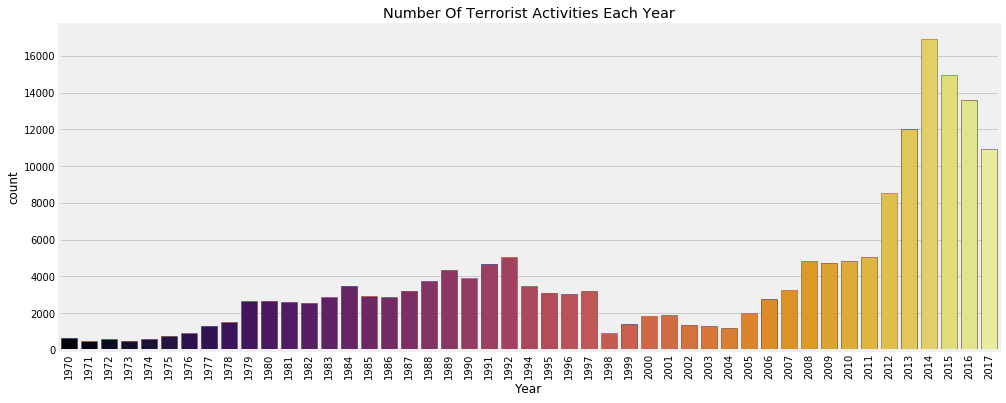

In [4]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Terrorism by region

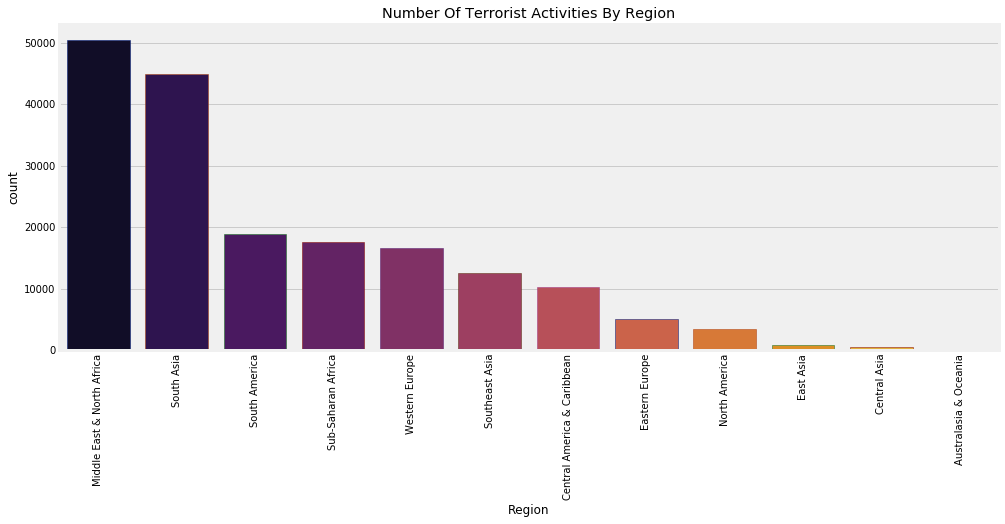

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='inferno',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

## Terrorism in Europe

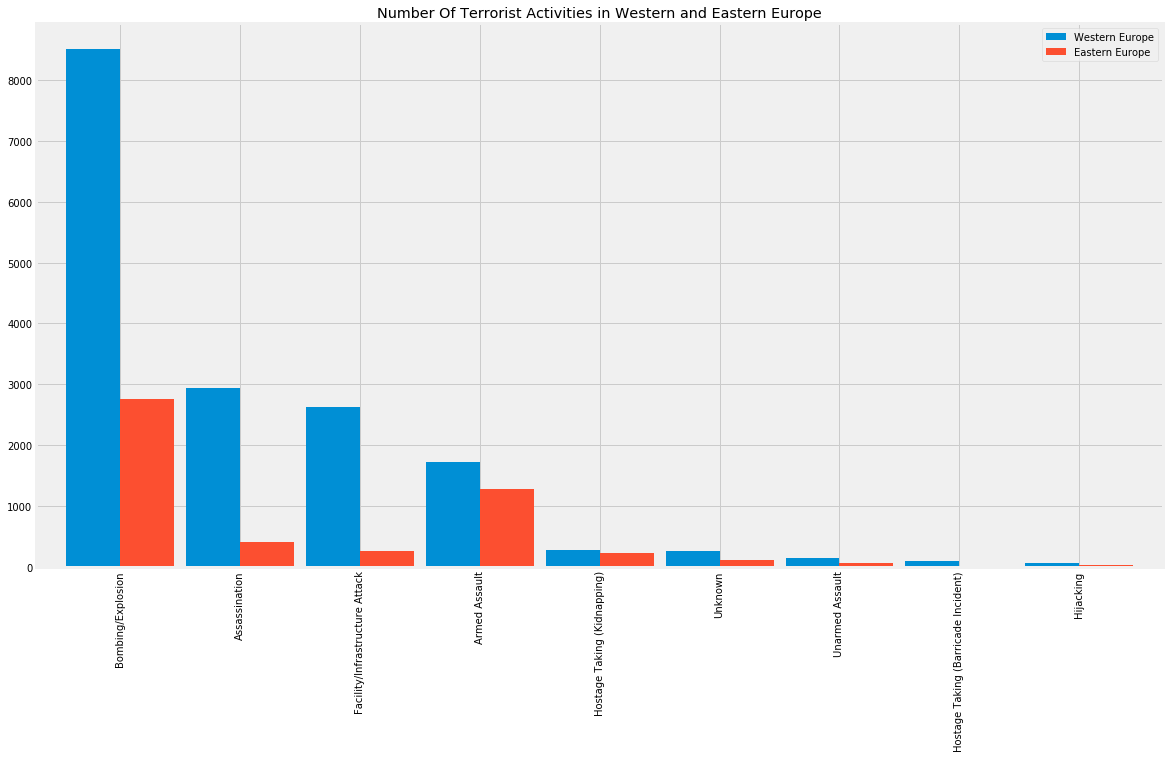

In [6]:
terror_western=terror[terror['Region']=='Western Europe']
terror_eastern=terror[terror['Region']=='Eastern Europe']
coun_terror1=terror_western['AttackType'].value_counts().to_frame()
coun_terror1.columns=['Western Europe']
coun_terror2=terror_eastern['AttackType'].value_counts().to_frame()
coun_terror2.columns=['Eastern Europe']
coun_terror1.merge(coun_terror2,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.title('Number Of Terrorist Activities in Western and Eastern Europe')
plt.show()

## Terrorism in Poland

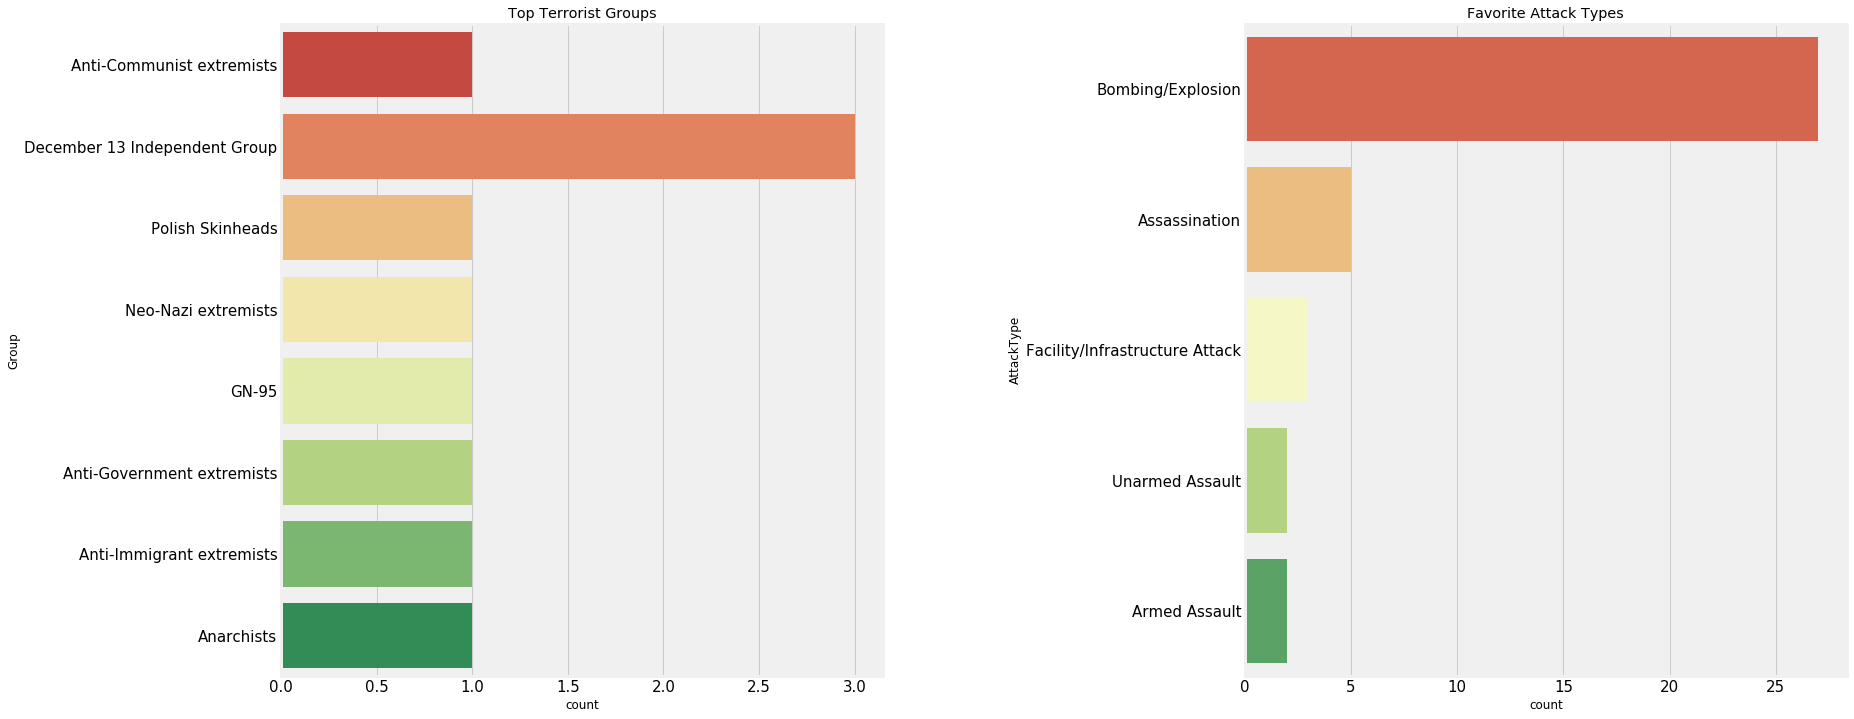

In [7]:
terror_poland=terror[terror['Country']=='Poland']
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_poland['Group'].value_counts()[1:11].index
ind_groups=terror_poland[terror_poland['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0],palette='RdYlGn')
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_poland,ax=ax[1],palette='RdYlGn')
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

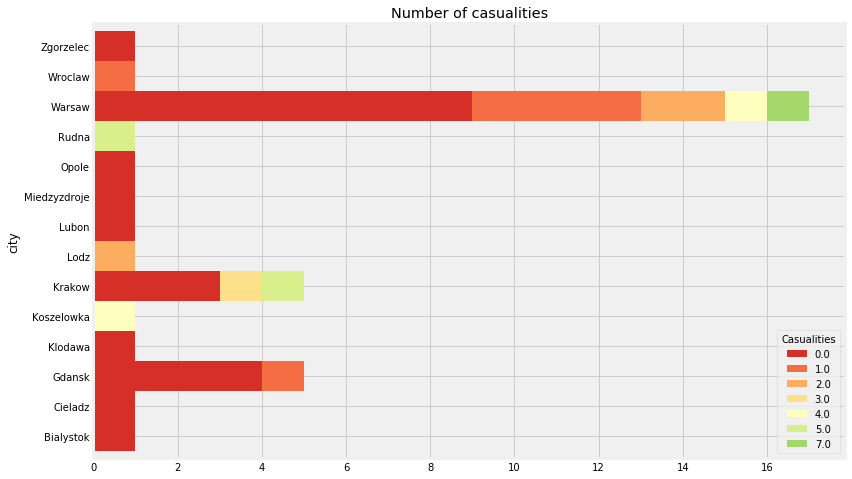

In [8]:
terror_poland=terror[terror['Country']=='Poland']
pd.crosstab(terror_poland.city,terror.Casualities).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Number of casualities')
plt.show()

## Terrorism in Kraków

In [10]:
terror_krakow=terror[terror['city']=='Krakow']
print('Maximum number of casualities in Kraków was', terror_krakow['Casualities'].max(), 'people, where', terror_krakow.loc[terror_krakow['Casualities'].idxmax()].Killed,'people was killed and', terror_krakow.loc[terror_krakow['Casualities'].idxmax()].Wounded,'people were wounded. The target for this attack was', terror_krakow.loc[terror_krakow['Casualities'].idxmax()].Target,'and it happened in', terror_krakow.loc[terror_krakow['Casualities'].idxmax()].Year, '.')

Maximum number of casualities in Kraków was 5.0 people, where 0.0 people was killed and 5.0 people were wounded. The target for this attack was Statue of Lenin and it happened in 1979 .
